In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from keras.models import load_model
import os
from tqdm import tqdm
import pickle

## Loading binary models

In [6]:
model_1_2 = load_model("model_1_and_2.h5")
model_1_3 = load_model("model_1_and_3.h5")
model_1_4 = load_model("model_1_and_4.h5")
model_1_5 = load_model("model_1_and_5.h5")
model_2_3 = load_model("model_2_and_3.h5")
model_2_4 = load_model("model_2_and_4.h5")
model_2_5 = load_model("model_2_and_5.h5")
model_3_4 = load_model("model_3_and_4.h5")
model_3_5 = load_model("model_3_and_4.h5")
model_4_5 = load_model("model_4_and_5.h5")

In [90]:
def predictall(image):
    
    a = 0
    b = 0
    c = 0
    d = 0
    e = 0
    if(np.argmax(model_1_2.predict(image)) == 0):
        a = a+1
    else:
        b = b+1
        
        
    if(np.argmax(model_1_3.predict(image)) == 0):
        a = a + 1    
    else:
        c = c + 1
        
        
    if(np.argmax(model_1_4.predict(image)) == 0):
        a = a +1    
    else:
        d = d +1 
        
        
    if(np.argmax(model_1_5.predict(image)) == 0):
        a = a + 1
    else:
        e = e + 1
        
        
    if(np.argmax(model_2_3.predict(image)) == 0):
        b = b + 1
    else:
        c+=1
        
        
    if(np.argmax(model_2_4.predict(image)) == 0):
        b+=1 
    else:
        d+=1
        
        
    if(np.argmax(model_2_5.predict(image)) == 0):
        b+=1
    else:
        e+=1
        
        
    if(np.argmax(model_3_4.predict(image)) == 0):
        c+=1
    else:
        d+=1
        
        
    if(np.argmax(model_3_5.predict(image)) == 0):
        c+=1
    else:
        e+=1
        
        
    if(np.argmax(model_4_5.predict(image)) == 0):
        d+=1
    else:
        e+=1
        
    Val = {'0':a,'1':b,'2':c,'3':d,'4':e}
    return max(Val, key=Val.get)

In [33]:
def predictall1(image):
    
    a = 0
    b = 0
    c = 0
    d = 0
    e = 0
    temp = model_1_2.predict(image)
    a += temp[0][0]
    b += temp[0][1]
    
    temp = model_1_3.predict(image)
    a += temp[0][0]
    c += temp[0][1]
    
    temp = model_1_4.predict(image)
    a += temp[0][0]
    d += temp[0][1]
    
    temp = model_1_4.predict(image)
    a += temp[0][0]
    e += temp[0][1]
    
    temp = model_2_3.predict(image)
    b += temp[0][0]
    c += temp[0][1]
    
    temp = model_2_4.predict(image)
    b += temp[0][0]
    d += temp[0][1]
    
    temp = model_2_5.predict(image)
    b += temp[0][0]
    e += temp[0][1]
    
    temp = model_3_4.predict(image)
    c += temp[0][0]
    d += temp[0][1]
    
    temp = model_3_5.predict(image)
    c += temp[0][0]
    e += temp[0][1]
    
    temp = model_4_5.predict(image)
    d += temp[0][0]
    e += temp[0][1]
    
        
    Val = {'0':a,'1':b,'2':c,'3':d,'4':e}
    return max(Val, key=Val.get)

In [28]:
a =0

In [194]:
pickle_in = open("X_4_5.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_4_5.pickle","rb")
y = pickle.load(pickle_in)

In [179]:
predictall1(np.reshape(X[0],(-1,256,256,3)))

'4'

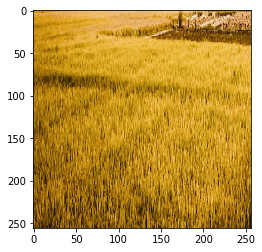

In [180]:
plt.imshow(X[0])

In [148]:
def predfunc(X):
    pred = []
    
    for x in X:
        pred.append(predictall1(np.reshape(x,(-1,256,256,3))))
        
    return pred
    

In [196]:
pred = predfunc(X[:25])

In [80]:
type(pred[1])

str

In [170]:
y[:10]

[4, 2, 4, 4, 2, 2, 4, 2, 2, 2]

In [195]:
for i in range(0,len(y)):
    if y[i]==1:
        y[i] = 4
    if y[i] == 0:
        y[i] = 3

In [197]:
results = list(map(int, pred))

In [186]:
results

[4, 2, 4, 4, 2, 2, 4, 2, 2, 2]

In [183]:
y[:10]

[4, 2, 4, 4, 2, 2, 4, 2, 2, 2]

In [198]:
a = np.array(results)   # actual labels
b = np.array(y[:25])

correct = (a == b)
accuracy = correct.sum() / correct.size


In [199]:
accuracy

0.72

In [77]:
X[:10]

array([[[[128, 128,  61],
         [140, 135,  68],
         [113, 102,  34],
         ...,
         [ 81,  88,  41],
         [194, 203, 145],
         [187, 196, 136]],

        [[ 96, 101,  39],
         [126, 123,  56],
         [112, 100,  33],
         ...,
         [176, 182, 127],
         [189, 198, 138],
         [188, 197, 138]],

        [[ 90, 100,  38],
         [117, 115,  50],
         [158, 145,  71],
         ...,
         [196, 202, 141],
         [188, 195, 135],
         [143, 151,  94]],

        ...,

        [[104, 120,  57],
         [112, 138,  62],
         [113, 139,  62],
         ...,
         [ 73,  91,  26],
         [ 74,  92,  27],
         [ 60,  76,  18]],

        [[100, 117,  54],
         [111, 136,  61],
         [115, 140,  63],
         ...,
         [ 74,  91,  27],
         [ 64,  81,  21],
         [ 68,  83,  23]],

        [[ 99, 116,  53],
         [110, 134,  59],
         [112, 138,  60],
         ...,
         [ 74,  88,  27],
        

In [105]:
results

[3,
 4,
 2,
 4,
 2,
 2,
 0,
 4,
 3,
 2,
 2,
 0,
 3,
 4,
 2,
 0,
 0,
 2,
 0,
 2,
 3,
 2,
 2,
 2,
 4,
 2,
 4,
 2,
 2,
 1,
 4,
 2,
 1,
 2,
 2,
 2,
 4,
 0,
 2,
 2,
 4,
 2,
 4,
 2,
 2,
 3,
 4,
 0,
 4,
 2,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 4,
 3,
 2,
 2,
 0,
 4,
 2,
 0,
 4,
 3,
 2,
 3,
 2,
 2,
 2,
 3,
 0,
 4,
 2,
 2,
 2,
 3,
 2,
 4,
 2,
 0,
 0,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 0,
 2,
 4]

In [181]:
y[:10]

[4, 2, 4, 4, 2, 2, 4, 2, 2, 2]